## EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Dataset: https://www.kaggle.com/datasets/mirichoi0218/insurance/data
df = pd.read_csv("../data/CarPrice_Assignment.csv")

In [2]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


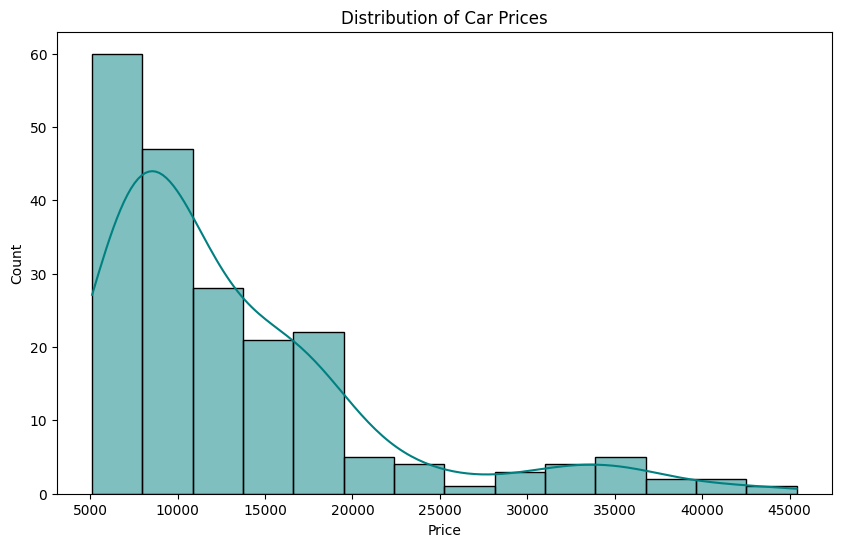

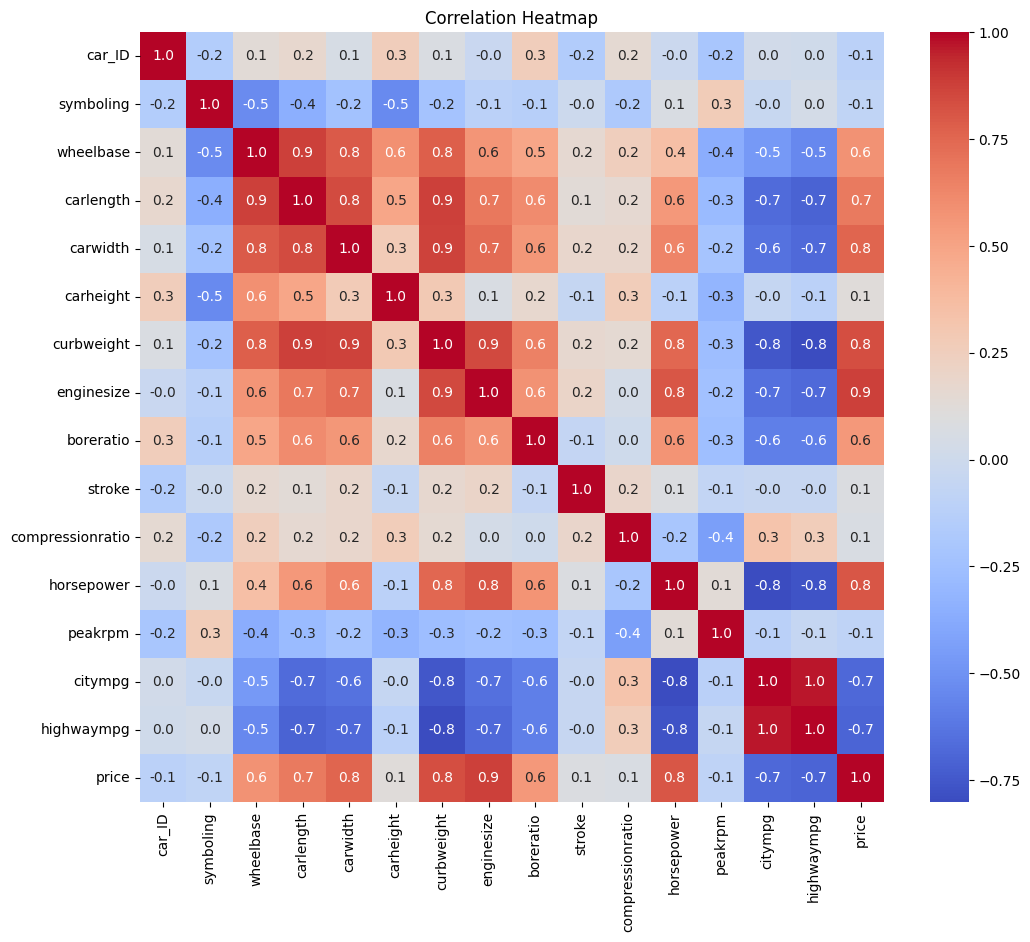

In [5]:
# Plot the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, color='teal')
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.show()

# Visualize correlations between numerical variables
plt.figure(figsize=(12, 10))
numeric_cols = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Correlation Heatmap')
plt.show()

## Data Cleaning and Preprocessing

In [6]:
df.isnull().sum().sum()

np.int64(0)

In [7]:
df["brand"] = df["CarName"].apply(lambda x: x.split(" ")[0])

In [8]:
df["brand"]

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: brand, Length: 205, dtype: object

In [9]:
df.drop(["car_ID", "CarName"], axis=1, inplace=True)

In [10]:
print(df['brand'].value_counts())

brand
toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: count, dtype: int64


In [11]:
df['brand'] = df['brand'].replace(
    {'maxda': 'mazda',
     'porcshce': 'porsche',
     'toyouta': 'toyota',
     'vokswagen': 'volkswagen',
     'vw': 'volkswagen',
     'Nissan' : 'nissan'
    }
)

In [12]:
print(df['brand'].value_counts())

brand
toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: count, dtype: int64


## Train-Test Split and Preprocessing

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

In [14]:
# Defining features and target
X = df.drop("price", axis=1)
y = df["price"]

In [15]:
# Identifying column types automatically
numerics = X.select_dtypes(include=[np.number]).columns.tolist()
categoricals = X.select_dtypes(include=["object"]).columns.tolist()

In [16]:
# Train Test Split
X_train , X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

In [17]:
# Creating the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerics),
        ("cat", OneHotEncoder(handle_unknown="ignore", drop="first"), categoricals)
    ]
)

In [18]:
# Building the Pipeline
model_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())    
])

In [19]:
model_pipeline.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('regressor', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformer

In [20]:
model_pipeline.predict(X_test)

C:\Users\Business\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:261: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(msg, UserWarning)


array([29778.5170846 , 21742.73235495, 11134.24819083, 12506.64100721,
       30073.8111985 ,  6788.18571244,  7677.1953874 ,  7230.80555871,
        9508.13260147,  7862.71015641, 13097.80324928,  6066.12944487,
       15683.92019417,  9778.86619272, 43331.59759887,  6485.70709762,
       -1649.20120797, 13667.81650849,  9059.6705036 ,  9715.14876292,
       11402.91949037, 15642.67815999,  7618.84115101,  4426.68068426,
        7018.97183018, 30433.84861255, 11186.1184046 , 15877.57032403,
        6450.38206532, 16107.20363049, 29540.37129668,  6670.05637912,
        5027.36258124, 17906.35714948,  7804.09308803, 28920.36571107,
       11746.89186227, 12728.50500572,  9073.98451532, 14239.85999686,
        8323.45753643])

## Model Evaluation & Visualization

In [21]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [22]:
y_pred = model_pipeline.predict(X_test)

C:\Users\Business\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:261: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(msg, UserWarning)


In [28]:
# Calculating performance metrics
metrics = {
    "R2 Score": [r2_score(y_test, y_pred)],
    "MAE": [mean_absolute_error(y_test, y_pred)],
    "RMSE": [np.sqrt(mean_squared_error(y_test, y_pred))]
}

for key, value in metrics.items():
    print(f"{key}: {value[0]:.4f}")

R2 Score: 0.9097
MAE: 1763.5660
RMSE: 2669.9339


In [31]:
# Creating a comparison DataFrame for actual vs predicted
df_comparison = pd.DataFrame({
    "Actual Price": y_test,
    "Predicted Price": y_pred,
    "Residual (Error)": y_pred - y_test
})

df_comparison_rounded = df_comparison.round(2)
display(df_comparison_rounded.head())

,Actual Price,Predicted Price,Residual (Error)
15,30760.00,29778.52,-981.48
9,17859.17,21742.73,3883.57
100,9549.00,11134.25,1585.25
132,11850.00,12506.64,656.64
68,28248.00,30073.81,1825.81


## Feature Importance (Coefficients) Analysis

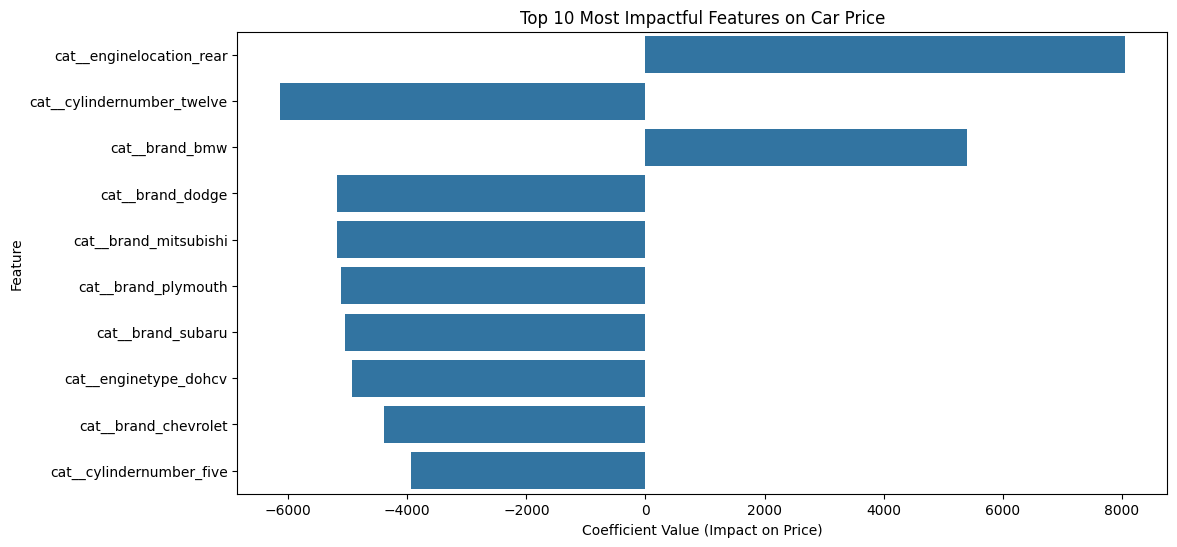

In [35]:
feature_names = model_pipeline.named_steps["preprocessor"].get_feature_names_out()
coefficients = model_pipeline.named_steps["regressor"].coef_

df_importance = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients
})

df_importance["Abs_Coefficient"] = df_importance["Coefficient"].abs()
df_importance = df_importance.sort_values(by="Abs_Coefficient", ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x="Coefficient", y="Feature", data=df_importance)
plt.title("Top 10 Most Impactful Features on Car Price")
plt.xlabel("Coefficient Value (Impact on Price)")
plt.show()